In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import  AutoReg

In [17]:
df=pd.read_csv("neonatalseries.csv",index_col=0,parse_dates=True)

/var/folders/cz/fk8gczx52ss7yswk1p4l28km0000gn/T/ipykernel_68115/88613535.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [3]:
df.tail()

,Neonatal
Date,
2012-01-01,35.554167
2013-11-20,34.353075
2014-09-17,33.133622
2015-04-03,31.955532
2016-06-08,30.072362


In [4]:
x=df.values

<Axes: xlabel='Date'>

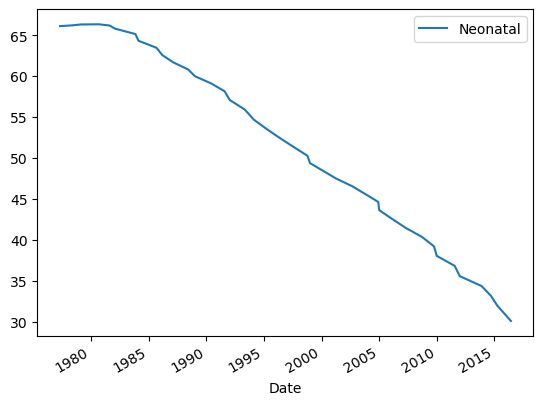

In [5]:
df.plot()

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
dftest=adfuller(df['Neonatal'], autolag='AIC')

In [11]:
print(" 1: ADF: ", dftest[0])
print(" 2: P-value ", dftest[1])
print(" 3: number of lag: ", dftest[2])

 1: ADF:  1.3675646365725582
 2: P-value  0.9969616946516104
 3: number of lag:  1


In [12]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

/Users/kasahunabdisa/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


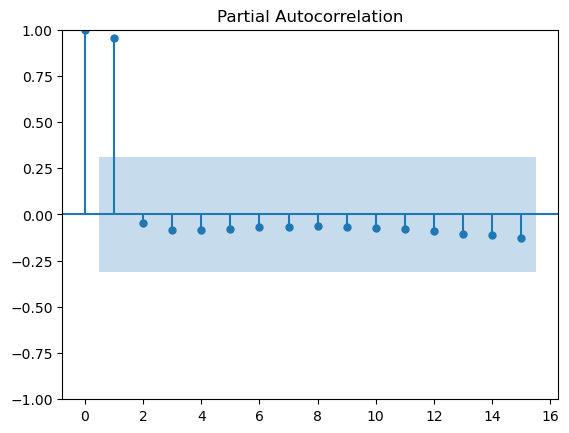

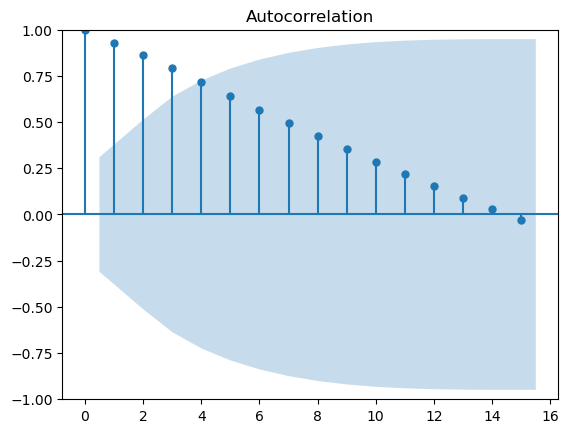

In [13]:
pacf=plot_pacf(df['Neonatal'], lags=15)
acf=plot_acf(df['Neonatal'], lags=15)

In [14]:
xtrain=x[:len(x)-3]
xtest=x[len(x)-3:]

In [15]:
model=AutoReg(xtrain,lags=2).fit()

In [16]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   37
Model:                     AutoReg(2)   Log Likelihood                  42.803
Method:               Conditional MLE   S.D. of innovations              0.071
Date:                Sun, 08 Oct 2023   AIC                            -77.605
Time:                        11:51:47   BIC                            -71.384
Sample:                             2   HQIC                           -75.457
                                   37                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1069      0.124     -0.862      0.389      -0.350       0.136
y.L1           1.8881      0.045     41.941      0.000       1.800       1.976
y.L2          -0.8886      0.046    -19.231      0.0

In [17]:
pred=model.predict(start=len(xtrain),end=len(x)-1,dynamic=False)

[33.16114197 31.97796379 30.80317722]


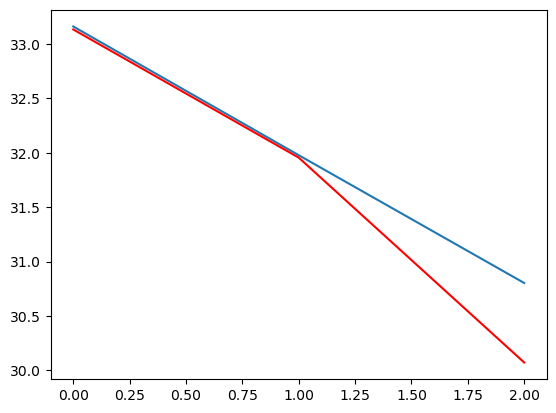

In [18]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(xtest, color='red')
print(pred)

In [19]:
#error calculation
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(xtest,pred))
print(rmse)

0.4224342066998649


In [20]:
pred_future=model.predict(start=len(x)+1, end=len(x)+9, dynamic=False)

In [21]:
print("Predict the next Nine year Neonatal mortality")
print(pred_future)
print("Number of predictions made :\t:", len(pred_future))

Predict the next Nine year Neonatal mortality
[28.4775026  27.32605365 26.18186799 25.04472836 23.91443806 22.79081875
 21.67370853 20.56296016 19.45843951]
Number of predictions made :	: 9


In [ ]:
#use Arima Model for forecasting and for confidence interval

In [6]:
from statsmodels.tsa.arima.model import ARIMA

In [7]:
model = ARIMA(x, order=(5,0,0))

In [8]:
model_fit = model.fit()

/Users/kasahunabdisa/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/kasahunabdisa/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(5, 0, 0)   Log Likelihood                  12.449
Date:                Mon, 30 Oct 2023   AIC                            -10.897
Time:                        16:35:51   BIC                              0.925
Sample:                             0   HQIC                            -6.623
                                 - 40                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.3857     31.786      1.585      0.113     -11.914     112.685
ar.L1          2.2564      0.271      8.338      0.000       1.726       2.787
ar.L2         -0.8659      0.320     -2.707      0.007      -1.493      -0.239
ar.L3         -1.6552      0.320     -5.178      0.000      -2.282      -1.029
ar.L4          1.8652      0.321      5.817      0.000       1.237       2.494
ar.L5         -0.6017      0.172     -3.507      0.000      -0.938      -0.265
sigma2         0.0172      0.003      5.701      0.000       0.011       0.023
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               613.07
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               7.79   Skew:                            -3.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
result = model_fit.get_forecast(9)

In [11]:
print(result.predicted_mean)

[28.08671294 25.63524206 23.47665863 21.21194663 19.45829152 17.65773066
 16.31103488 14.80897975 13.65805863]


In [ ]:
[28.4775026  27.32605365 26.18186799 25.04472836 23.91443806 22.79081875
 21.67370853 20.56296016 19.45843951]



In [12]:
#confidence interval
ci = result.conf_int(0.05)

In [13]:
print(ci) 

[[27.82981868 28.34360719]
 [25.00121633 26.26926779]
 [22.21960024 24.73371702]
 [19.23790955 23.18598371]
 [16.6381014  22.27848165]
 [13.98256378 21.33289754]
 [11.73302448 20.88904528]
 [ 9.35160241 20.26635709]
 [ 7.29113314 20.02498411]]


In [67]:
#Draw projection with Confidence interval

df1=pd.read_csv('ARNeonatalNationalTrend.csv')
df1.head(5)

,Year,Mean,Lower_Bound,Upper_Bound
0,2016,30.07,29.00,31.00
1,2017,28.08,27.82,28.34
2,2018,25.63,25.00,26.27
3,2019,23.47,22.21,24.73
4,2020,21.21,19.24,23.19


In [71]:
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv('ARNeonatalNationalTrend.csv')

fig = go.Figure([
    go.Scatter(
        name='Mean',
        x=df['Year'],
        y=df['Mean'],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    ),
    go.Scatter(
        name='Upper Bound',
        x=df['Year'],
        y=df['Upper_Bound'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    ),
    go.Scatter(
        name='Lower Bound',
        x=df['Year'],
        y=df['Lower_Bound'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(0, 150, 255, 0.3)',
        fill='tonexty',
        showlegend=False
    )
])
fig.update_layout(
    yaxis_title='National Neonatal Mortality  rate  ',
    title='National Neonatal Mortality  Trend to 2025',
    hovermode="x"
)
fig.show()